In [10]:
# Преоразовать существующий код для распознавания последовательности рукописных символов в текст.
# Написать генератор произвольной последовательности рукописных символов.

# ГЕНЕРАЦИЯ НАБОРА ДАННЫХ
# Сгенерировать набор текстовых строк из допустимых символов.
# Каждому набору поставить в соотвествие массив изоражений соответствующих символов.
# Добавить пробелы для разделения слов, символы пробелов не использовать во время классификации.

# КЛАССИФИКАЦИЯ (k ближайших соседей)
# Часть символов оставить для обучения классификатора . Остальные  классифицировать
# по аналогии с примером mnist с прошлого занятия. Т.е. преобразовывать изображение в вектор.
# Выбрать оптимальный классификатор в зависимости от k- количество соседей.
# Метрика для измерения точности классификации, и выбора оптимального классификатора относительно параметра k - accuracy.

# РАСПОЗНАВАНИЕ
# Итак, к данному этапу Вы из массива изображений "восстановили" текст.
# Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.
# Рассчитайте метрику CER.

In [11]:
%pip install matplotlib
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Список допустимых символов: ['(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'h', 't', 'w', 'X', 'y']
Сгенерированная строка 1: 7)-31962hy3t+71


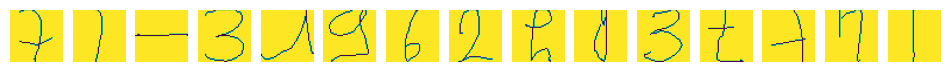

Сгенерированная строка 2: th97674,,5t3


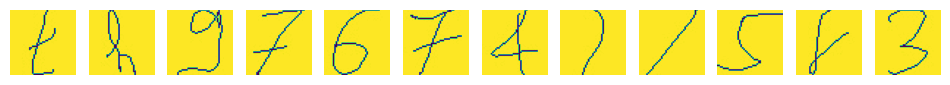

Сгенерированная строка 3: 31)1h--1(6


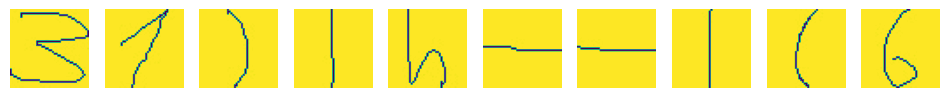

Сгенерированная строка 4: 6+2,93


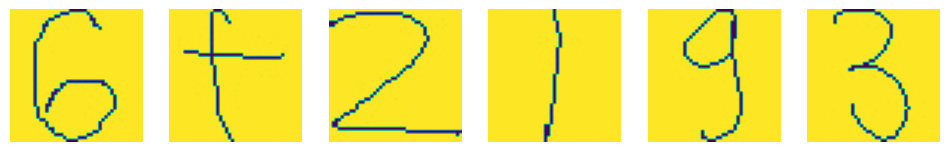

Сгенерированная строка 5: 3


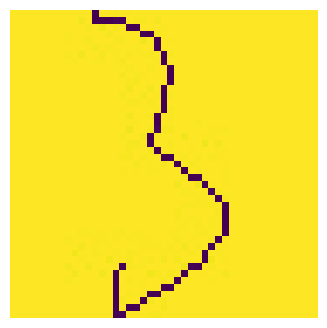

In [12]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Получаем путь к директории, где находится исполняемый файл
current_directory = os.path.dirname(os.path.abspath('AIM_practice_3.ipynb'))
# Определяем путь к папке с изображениями
images_folder = os.path.join(current_directory, 'data')  # Папка с изображениями

# Получаем список доступных символов из папки
allowed_chars = os.listdir(images_folder)
print(f'Список допустимых символов: {allowed_chars}')

# Функция для генерации набора строк с произвольной длиной
def generate_strings(num_strings, max_length):
    generated_strings = []
    image_arrays = []
    
    for _ in range(num_strings):
        # Генерируем случайную длину для текущей строки
        length = random.randint(1, max_length)
        
        # Генерируем строку из допустимых символов
        characters = random.choices(allowed_chars, k=length)
        generate_str = ''.join(characters)
        generated_strings.append(generate_str)

        # Создание массива изображений для текущей строки
        current_images = []
        for char in generate_str:
            char_folder_path = os.path.join(images_folder, char)  # Путь к папке с изображениями для символа
            if os.path.exists(char_folder_path):
                # Получаем список всех изображений в папке
                image_files = os.listdir(char_folder_path)
                if image_files:  # Проверяем, есть ли изображения
                    # Выбираем случайное изображение из папки
                    random_image_path = os.path.join(char_folder_path, random.choice(image_files))
                    current_images.append(Image.open(random_image_path))
                else:
                    print(f'В папке "{char_folder_path}" нет изображений.')
            else:
                print(f'Папка для символа "{char}" не найдена: {char_folder_path}')
        
        image_arrays.append(current_images)
    
    return generated_strings, image_arrays

# Число строк и максимальная длина
num_strings = 5   
max_length = 15  

# Генерация строк и изображений
generated_strings, image_arrays = generate_strings(num_strings, max_length)

# Отображение сгенерированных строк и соответствующих изображений
for idx, generated_str in enumerate(generated_strings, start=1):
    print(f'Сгенерированная строка {idx}: {generated_str}')
    
    # Настройка графического пользовательского интерфейса
    plt.figure(figsize=(12, 4))
    
    for j, img in enumerate(image_arrays[idx-1]):
        plt.subplot(1, len(image_arrays[idx-1]), j+1)
        if img is not None:
            plt.imshow(img)
            plt.axis('off')  # Убираем оси
        else:
            plt.imshow(np.zeros((10, 10, 3), dtype=np.uint8))

    plt.show()

In [13]:
import os
import shutil
import random

# Получаем путь к директории, где находятся изображения
current_directory = os.path.dirname(os.path.abspath('AIM_practice_3.ipynb'))
images_folder = os.path.join(current_directory, 'data') 
output_folder = os.path.join(current_directory, 'selected_data')

os.makedirs(output_folder, exist_ok=True)

allowed_chars = os.listdir(images_folder)

for char in allowed_chars:
    char_folder_path = os.path.join(images_folder, char)  # Путь к папке с изображениями для символа
    
    if os.path.exists(char_folder_path):
        image_files = os.listdir(char_folder_path)
        
        selected_images = random.sample(image_files, min(2500, len(image_files)))

        output_char_folder = os.path.join(output_folder, char)
        os.makedirs(output_char_folder, exist_ok=True)

        for image_file in selected_images:
            src_path = os.path.join(char_folder_path, image_file)
            dst_path = os.path.join(output_char_folder, image_file)
            
            try:
                shutil.copy(src_path, dst_path)
            except PermissionError as e:
                print(f"Ошибка доступа: не удалось скопировать файл '{src_path}'. {e}")
            except FileNotFoundError as e:
                print(f"Файл не найден: '{src_path}'. {e}")
            except Exception as e:
                print(f"Произошла ошибка при копировании файла '{src_path}'. {e}")

print("Копирование изображений завершено.")

Ошибка доступа: не удалось скопировать файл 'c:\Users\usicc\OneDrive\Рабочий стол\TMOINDR\data\8\1'. [Errno 13] Permission denied: 'c:\\Users\\usicc\\OneDrive\\Рабочий стол\\TMOINDR\\data\\8\\1'
Копирование изображений завершено.


Лучшее значение k: 1
Точность на тестовом наборе: 0.89


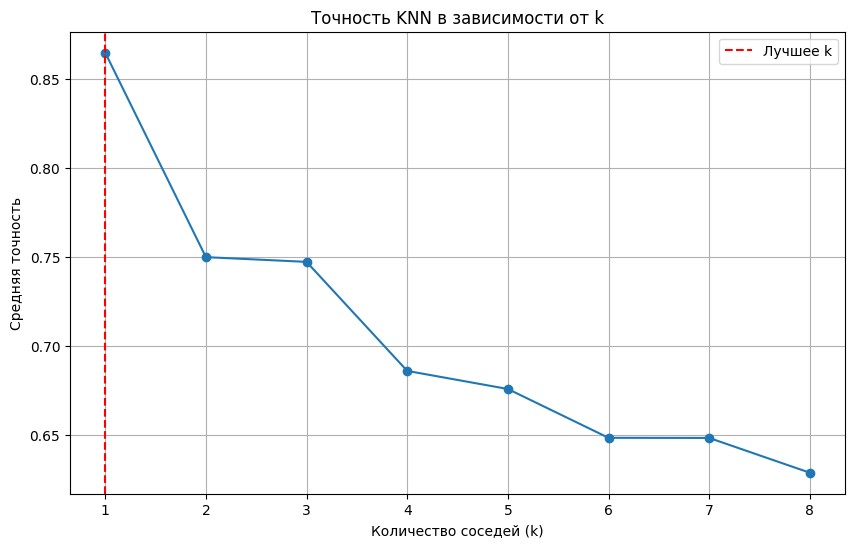

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_folder = os.path.join(os.path.dirname(os.path.abspath('AIM_practice_3.ipynb')), 'selected_data')

images = []
labels = []

for char in os.listdir(data_folder):
    char_folder_path = os.path.join(data_folder, char)
    
    if os.path.isdir(char_folder_path):
        for image_file in os.listdir(char_folder_path):
            image_path = os.path.join(char_folder_path, image_file)

            img = Image.open(image_path).convert('L') 
            img = img.resize((32, 32))  
            img_array = np.array(img).flatten() 
            images.append(img_array)
            labels.append(char) 

images = np.array(images)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Подбор оптимального значения k с помощью GridSearchCV
param_grid = {'n_neighbors': range(1, 9)}
knn = KNeighborsClassifier()

# Задаем метрику для оценки производительности
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Лучшее значение k: {best_k}')

# Тестирование на тестовом наборе
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность на тестовом наборе: {accuracy:.2f}')

# График зависимости точности от k
k_values = range(1, 9)
scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title('Точность KNN в зависимости от k')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Средняя точность')
plt.xticks(k_values)
plt.grid()
plt.axvline(x=best_k, color='red', linestyle='--', label='Лучшее k')
plt.legend()
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def train_model_with_best_k(X_train, y_train, best_k):
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)
    return model

data_folder = os.path.join(os.path.dirname(os.path.abspath('AIM_practice_3.ipynb')), 'selected_data')

images = []
labels = []

for char in os.listdir(data_folder):
    char_folder_path = os.path.join(data_folder, char)
    
    if os.path.isdir(char_folder_path):
        for image_file in os.listdir(char_folder_path):
            image_path = os.path.join(char_folder_path, image_file)
            img = Image.open(image_path).convert('L')
            img = img.resize((32, 32))
            img_array = np.array(img).flatten()
            images.append(img_array)
            labels.append(char)

images = np.array(images)
labels = np.array(labels)

X_train, y_train = images, labels

model = train_model_with_best_k(X_train, y_train, best_k)

predicted_labels = []
accuracies_per_string = [] 

for gen_str in generated_strings:
    predicted_chars = []
    original_chars = list(gen_str) 
    correct_count = 0

    for char in original_chars:
        char_folder_path = os.path.join(images_folder, char)
        if os.path.exists(char_folder_path):
            image_files = os.listdir(char_folder_path)
            if not image_files:
                predicted_chars.append(None)
                continue
            
            random_image_path = os.path.join(char_folder_path, random.choice(image_files))
            img = Image.open(random_image_path).convert('L').resize((32, 32))
            img_array = np.array(img).flatten()
            
            predicted_char = model.predict([img_array])[0]  
            predicted_chars.append(predicted_char)
            
            if predicted_char == char:
                correct_count += 1
        else:
            predicted_chars.append(None)

    predicted_str = ''.join(filter(None, predicted_chars))
    predicted_labels.append(predicted_str)

    accuracy_for_string = correct_count / len(original_chars) if len(original_chars) > 0 else 0
    accuracies_per_string.append(accuracy_for_string)

for original, predicted, accuracy in zip(generated_strings, predicted_labels, accuracies_per_string):
    print(f'Оригинальная строка: {original} | Предсказанная строка: {predicted} | Точность: {accuracy:.2f}')

overall_accuracy = sum(accuracies_per_string) / len(accuracies_per_string) if accuracies_per_string else 0
print(f'Общая точность: {overall_accuracy:.2f}')

Оригинальная строка: 7)-31962hy3t+71 | Предсказанная строка: 7)-3,962hy3t+71 | Точность: 0.93
Оригинальная строка: th97674,,5t3 | Предсказанная строка: th97674,,5t3 | Точность: 1.00
Оригинальная строка: 31)1h--1(6 | Предсказанная строка: 31))h--1(6 | Точность: 0.90
Оригинальная строка: 6+2,93 | Предсказанная строка: 6+2,93 | Точность: 1.00
Оригинальная строка: 3 | Предсказанная строка: 3 | Точность: 1.00
Общая точность: 0.97


In [16]:
import random

# Функция для случайного удаления и добавления символов в строку
def perturb_string(original_string, allowed_chars, remove_prob=0.2, add_prob=0.2):
    modified_string = list(original_string)  # Преобразуем в список для изменения

    for i in range(len(modified_string)):
        if random.random() < remove_prob:
            modified_string[i] = None 
    
    modified_string = list(filter(None, modified_string))

    # Случайно добавляем символы
    for _ in range(int(len(original_string) * add_prob)):
        random_char = random.choice(allowed_chars)
        insert_pos = random.randint(0, len(modified_string))
        modified_string.insert(insert_pos, random_char)
    
    return ''.join(modified_string)

# Функция для вычисления Character Error Rate (CER)
def get_cer(original_string, predicted_string):
    errors_char = sum(1 for orig, pred in zip(original_string, predicted_string) if orig != pred)
    errors_char += abs(len(original_string) - len(predicted_string))
    return errors_char / len(original_string) if len(original_string) > 0 else 0 

noisy_predicted_labels = [perturb_string(predicted, allowed_chars) for predicted in predicted_labels]

# Вычисление CER для каждой строки
cers = []
for original, noisy_predicted in zip(generated_strings, noisy_predicted_labels):
    cer = get_cer(original, noisy_predicted)
    cers.append(cer)
    print(f'Оригинальная строка: {original} | Измененная предсказанная строка: {noisy_predicted} | CER: {cer:.2f}')

overall_cer = sum(cers) / len(cers) if cers else 0
print(f'Общая CER: {overall_cer:.2f}')

Оригинальная строка: 7)-31962hy3t+71 | Измененная предсказанная строка: 7)-36,960h2y3t+71 | CER: 0.87
Оригинальная строка: th97674,,5t3 | Измененная предсказанная строка: th976486,,t3 | CER: 0.33
Оригинальная строка: 31)1h--1(6 | Измененная предсказанная строка: 31)h-h-1()6 | CER: 0.50
Оригинальная строка: 6+2,93 | Измененная предсказанная строка: 6+2931 | CER: 0.50
Оригинальная строка: 3 | Измененная предсказанная строка: 3 | CER: 0.00
Общая CER: 0.44
